# Задание по визуализации покемонов
<h3>Содержание:</h3>
<ul>
    <li><span><a href="#Визуализация-покемонов"> Визуализация покемонов</a></span></li>
    <li><span><a href="#Общая-статистика-по-статам-покемонов">Общая статистика по статам покемонов</a></span></li>
    <li><span><a href="#Статистика-по-типам-покемонов">Статистика по типам покемонов</a></span></li>
    <li><span><a href="#Зависимость-показателей-от-легендарности">Зависимость показателей от легендарности</a></span></li>    
    <li><span><a href="#Зависимость-показателей-покемона-от-его-типа">Зависимость показателей покемона от типа</a></span></li> 
    <li><span><a href="#Распределение-некоторых-показателей">Распределение некоторых показателей</a></span></li>
</ul>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image
from IPython.core.display import HTML

import matplotlib.pyplot as plt

import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pokemon/Pokemon.csv


In [2]:
data = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
data 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Визуализация покемонов
по смотрим как выглядят покемоны, надо отметить, что некотыре из них в своей крайней стадии превращения не имеют изображения. Это связанно с тем, что данные стадии используются только в данной карточной игре и не являются настолько известными как остальные.

In [3]:
from IPython.display import display, HTML
s=""
for i in range(43):
    s+='<img src="{}" style="display:inline;margin:1px; width:150px"/>'.format("https://pokemongolife.ru/p/"+data['Name'][i]+".png",
                                                                                    data['Name'][i])

display(HTML(s))


## Общая статистика по статам покемонов
выведем в отдельную таблицу среднее значение, минимум, максимум, медиану, стандартное отклонение по основным характеристикам

In [4]:
data_stat = pd.DataFrame()
data_stat['min'] = data.iloc[:,4:-2].min()
data_stat['max'] = data.iloc[:,4:-2].max()
data_stat['mean'] = data.iloc[:,4:-2].mean()
data_stat['median'] = data.iloc[:,4:-2].median()
data_stat['std'] = data.iloc[:,4:-2].std()
data_stat

,min,max,mean,median,std
Total,180,780,435.10250,450.0,119.963040
HP,1,255,69.25875,65.0,25.534669
Attack,5,190,79.00125,75.0,32.457366
Defense,5,230,73.84250,70.0,31.183501
Sp. Atk,10,194,72.82000,65.0,32.722294
Sp. Def,20,230,71.90250,70.0,27.828916
Speed,5,180,68.27750,65.0,29.060474


Как видно, характеристика <b>total</b> значительно больше всех других, поэтому в дальнейшем, чтобы избежать сильного смещения в ее сторону, будем строить для нее графики отдельно, а по всем другим отдельно

## Статистика по типам покемонов
Некоторые покемоны могут иметь 2 типизацию. Например, Bulbasaur относится к травяным ядовитым покемонам, тогда как Charmander относится только к огненному типу. 

Выыведем солько покемонов имеют один тип, а сколько относится сразу к двум

Потом посмотрим на статистику, какой тип чаще всего встречается

In [5]:
print("Количество покемонов с 2мя типами: ", data[(~data['Type 1'].isna())&(~data['Type 2'].isna())].shape[0])
print("Количество покемонов с одним типом: ", data[(~data['Type 1'].isna())&(data['Type 2'].isna())].shape[0])

Количество покемонов с 2мя типами:  414
Количество покемонов с одним типом:  386


### Построим гистограмму, отражающую сколько покемонов разных в датасете

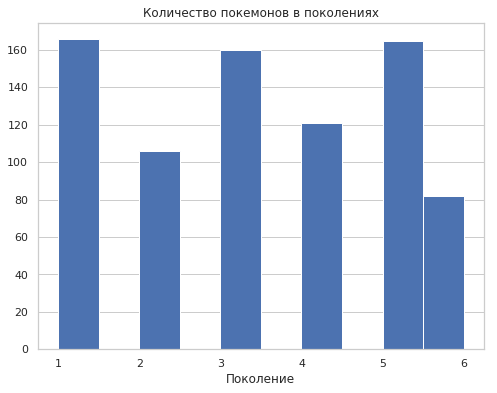

In [6]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
data['Generation'].hist()

plt.xlabel('Поколение')
plt.title("Количество покемонов в поколениях")
ax.grid(axis = 'x')

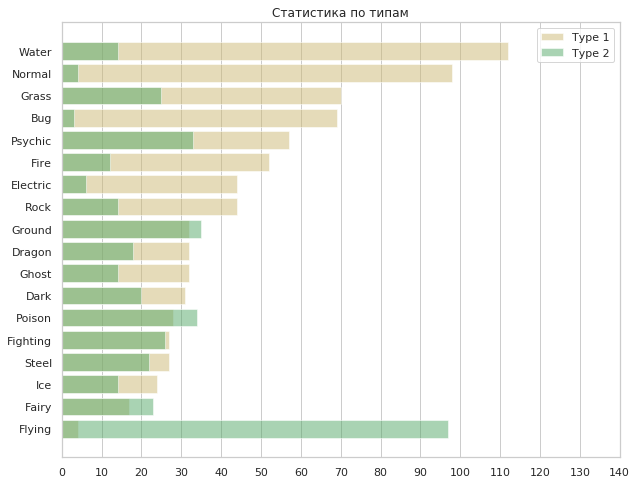

In [7]:
type_df = data['Type 1'].value_counts().reset_index().merge(data['Type 2'].value_counts().reset_index())
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(np.arange(len(type_df)), type_df['Type 1'], alpha = 0.5, color='y',label = 'Type 1')
ax.set_yticks(np.arange(len(type_df)))
ax.set_yticklabels(type_df['index'])

ax.barh(np.arange(len(type_df)), type_df['Type 2'], alpha = 0.5, color='g', label = 'Type 2')
ax.set_yticks(np.arange(len(type_df)))
ax.set_yticklabels(type_df['index'])

plt.xticks(range(0,150,10))

ax.invert_yaxis()  # labels read top-to-bottom

ax.grid(axis = 'y')
ax.set_title('Статистика по типам')
plt.legend()
plt.show()

По графику видно, что наиболее часто встречаемые в исходном датасете, это пакемоны водного типа

In [8]:
d_type2 = data[~data['Type 2'].isna()].copy()
d_type2['type'] = d_type2['Type 1'].str.cat(d_type2['Type 2'], sep =" ")
d_type2['type'].value_counts()

Normal Flying     24
Grass Poison      15
Bug Flying        14
Bug Poison        12
Ghost Grass       10
                  ..
Dragon Fairy       1
Grass Ground       1
Poison Bug         1
Electric Ghost     1
Normal Ground      1
Name: type, Length: 136, dtype: int64

In [9]:
data_stat2 = pd.melt(d_type2, id_vars=['#',"Name", "Type 1", "Type 2",'type','Generation','Legendary'], var_name="Stat")
total_stat2 = data_stat2[data_stat2['Stat']=='Total']


data_stat2

,#,Name,Type 1,Type 2,type,Generation,Legendary,Stat,value
0,1,Bulbasaur,Grass,Poison,Grass Poison,1,False,Total,318
1,2,Ivysaur,Grass,Poison,Grass Poison,1,False,Total,405
2,3,Venusaur,Grass,Poison,Grass Poison,1,False,Total,525
3,3,VenusaurMega Venusaur,Grass,Poison,Grass Poison,1,False,Total,625
4,6,Charizard,Fire,Flying,Fire Flying,1,False,Total,534
...,...,...,...,...,...,...,...,...,...
2893,719,Diancie,Rock,Fairy,Rock Fairy,6,True,Speed,50
2894,719,DiancieMega Diancie,Rock,Fairy,Rock Fairy,6,True,Speed,110
2895,720,HoopaHoopa Confined,Psychic,Ghost,Psychic Ghost,6,True,Speed,70
2896,720,HoopaHoopa Unbound,Psychic,Dark,Psychic Dark,6,True,Speed,80


преобразуем данные, чтоб можно было все статы вывести относительно других характеристик, так как <b>total </b>имеет очень большие значения по ставнению с остальными, выведем их в отдельную таблицу

In [10]:
data_stat = pd.melt(data, id_vars=['#',"Name", "Type 1", "Type 2",'Generation','Legendary'], var_name="Stat")
total_stat =data_stat[data_stat['Stat']=='Total']

data_stat = data_stat[data_stat['Stat']!='Total']

## Зависимость показателей от легендарности
По графику ниже наглядно видно, что у легенданых покемонов все показатели выше, чем у остальных

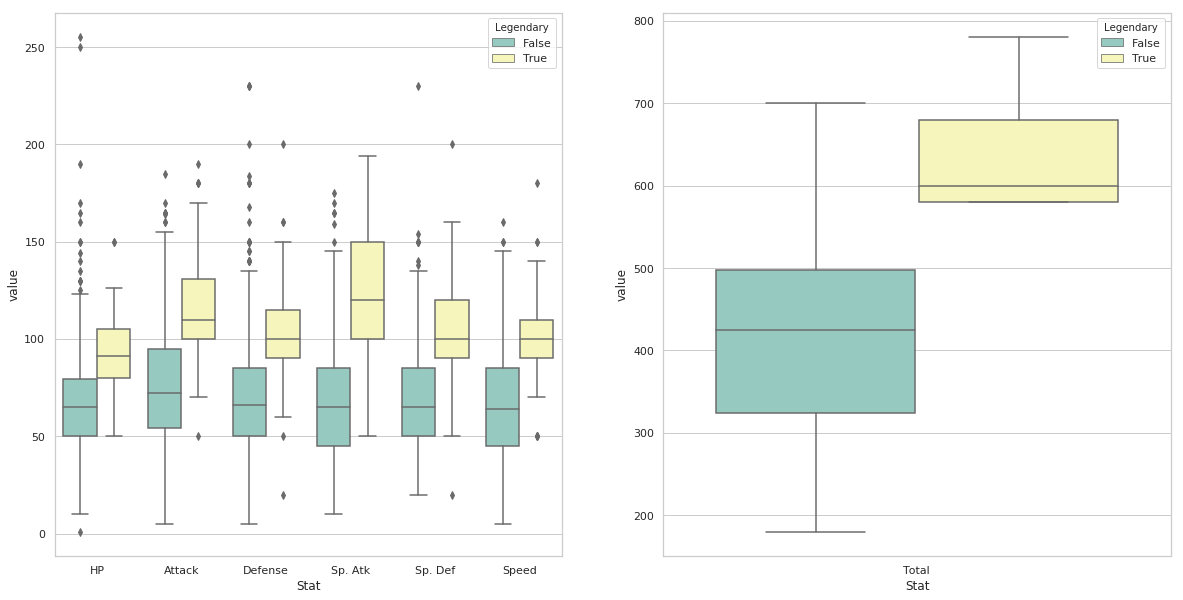

In [11]:
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(
                                nrows=1, ncols=2,
                                figsize=(20,10)
                                )
sns.boxplot(x="Stat", y="value", data=data_stat, hue="Legendary",palette="Set3", ax=ax1)
sns.boxplot(x="Stat", y = 'value', data=total_stat, hue="Legendary",palette="Set3", ax= ax2)
plt.show()

## Зависимость показателей силы покемоны от его поколения

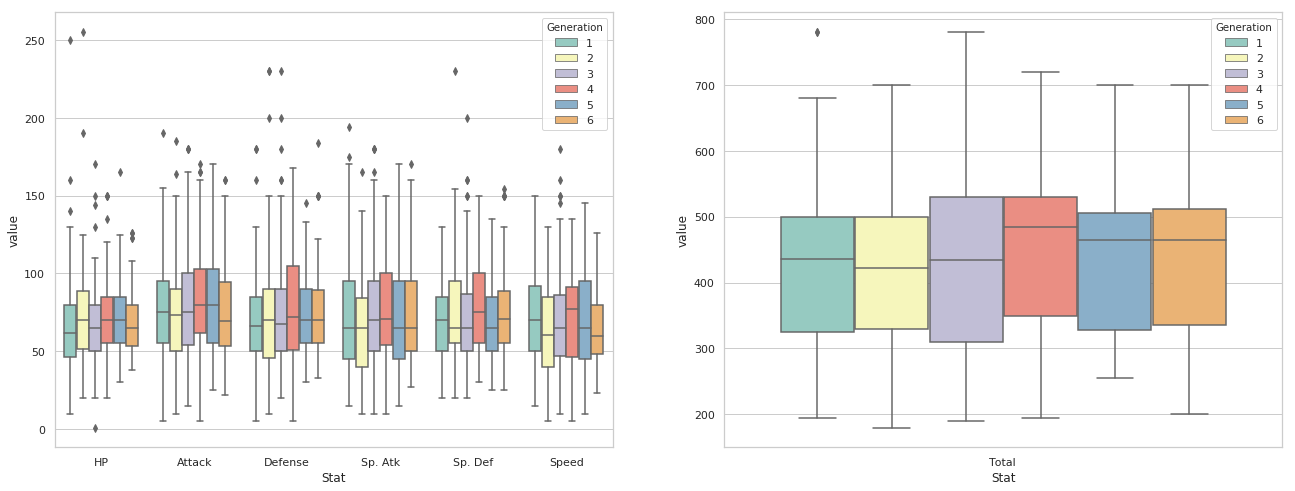

In [12]:
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(22,8))
sns.boxplot(x="Stat", y="value", data=data_stat, hue="Generation",palette="Set3", ax=ax1)
sns.boxplot(x="Stat", y = 'value', data=total_stat, hue="Generation",palette="Set3", ax= ax2)
plt.show()

График выше красивый, но непонятный, совместим 2 признака и посмотрим на тендецию 

## Легендарность покемона и его поколение. Проследим тенденцию между силой атаки и силой защиты от урона

Из графика ниже видно, что сила аттаки и защита от урона не зависит от поколения покемона, по большей части эти характеристики зависят от легендарности, как этот и подмечалось выше.

Здесь можно заметить что в обоих случаях покемоны 2го поколения имеют примерно равные характеристики атаки и защиты.

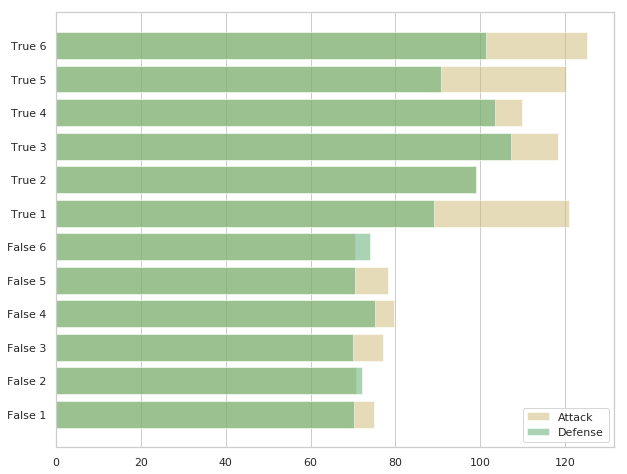

In [13]:
d = data.groupby(['Generation','Legendary']).agg({'Attack':'mean', 'Defense':'mean'}).reset_index().sort_values(by=['Legendary'])
d['Generation'] = d['Generation'].astype(str)
d['Legendary'] = d['Legendary'].astype(str)
d['leg_gen'] = d['Legendary'].str.cat(d['Generation'], sep =" ")

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(np.arange(d.shape[0]), d['Attack'], alpha = 0.5, color='y',label = 'Attack')
ax.set_yticks(np.arange(d.shape[0]))
ax.set_yticklabels(d['leg_gen'])

ax.barh(np.arange(d.shape[0]), d['Defense'], alpha = 0.5, color='g',label = 'Defense')
ax.set_yticks(np.arange(d.shape[0]))
ax.set_yticklabels(d['leg_gen'])

ax.grid(axis = 'y')
plt.legend()
plt.show()

## Зависимость показателей покемона от его типа


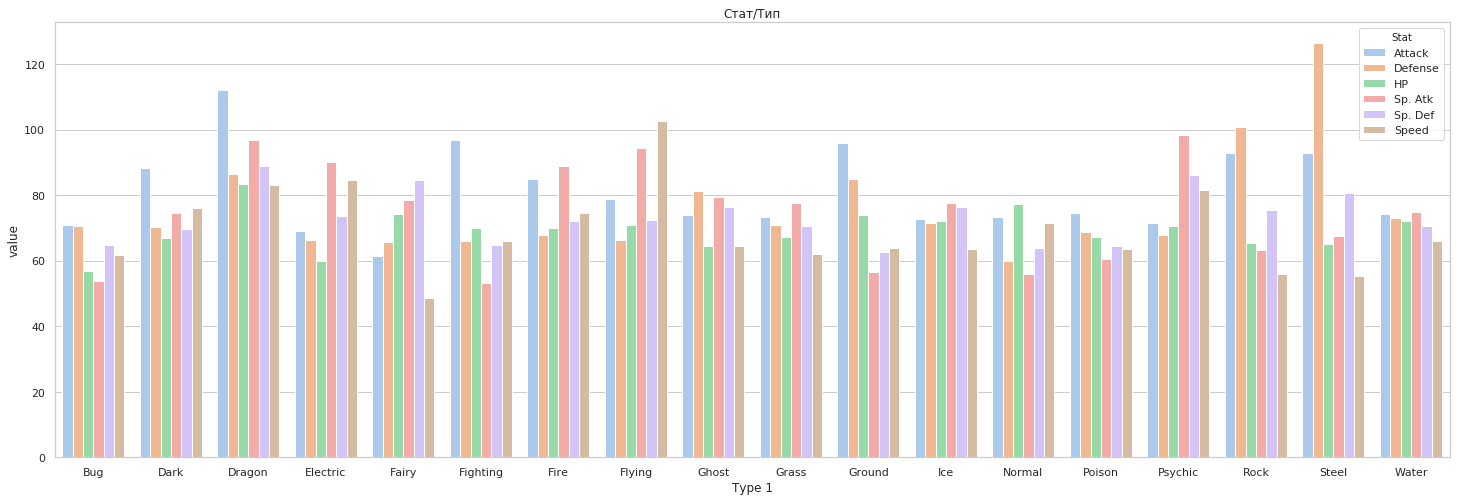

In [14]:
#sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(25,8))

d = data_stat.groupby(['Type 1','Stat']).value.mean().reset_index()
sns.barplot(x='Type 1',y='value',data = d, hue='Stat', palette = 'pastel')

plt.title('Стат/Тип')
plt.show()

## Зависимость характеристик от комбинаций типов покемона
смотрим на покемонов с двумя типами, отбираем наиболее часто повторяющиеся типы

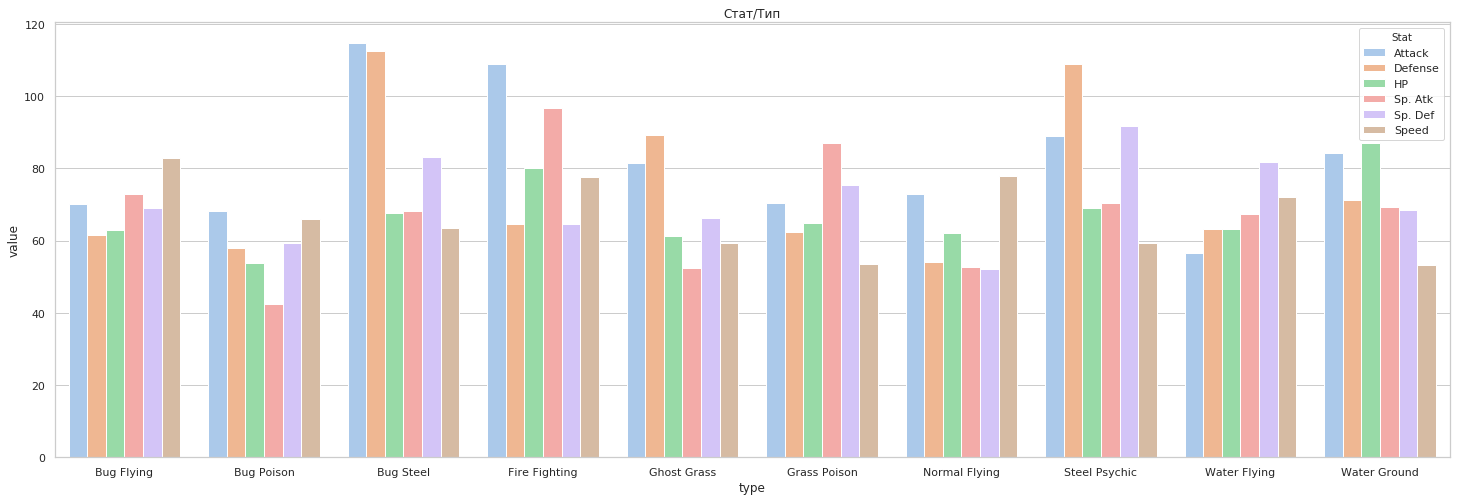

In [15]:
fig, ax = plt.subplots(figsize=(25,8))

d_type2 = data[~data['Type 2'].isna()].copy()
d_type2['type'] = d_type2['Type 1'].str.cat(d_type2['Type 2'], sep =" ")
d_type2['type'] = d_type2['type'].apply(lambda x: x if x in d_type2['type'].value_counts()[d_type2['type'].value_counts()>6].index else None)
d_type2 = d_type2[~d_type2['type'].isna()]

data_stat2 = pd.melt(d_type2, id_vars=['#',"Name", "Type 1", "Type 2",'type','Generation','Legendary'], var_name="Stat")
total_stat2 = data_stat2[data_stat2['Stat']=='Total']
data_stat2=data_stat2[data_stat2['Stat']!='Total']
data_stat2 = data_stat2.groupby(['type','Stat']).value.mean().reset_index()

sns.barplot(x='type',y='value',data = data_stat2, hue='Stat', palette = 'pastel')

plt.title('Стат/Тип')
plt.show()


Выведем тоже самое, но в виде круговых диограмм со статами

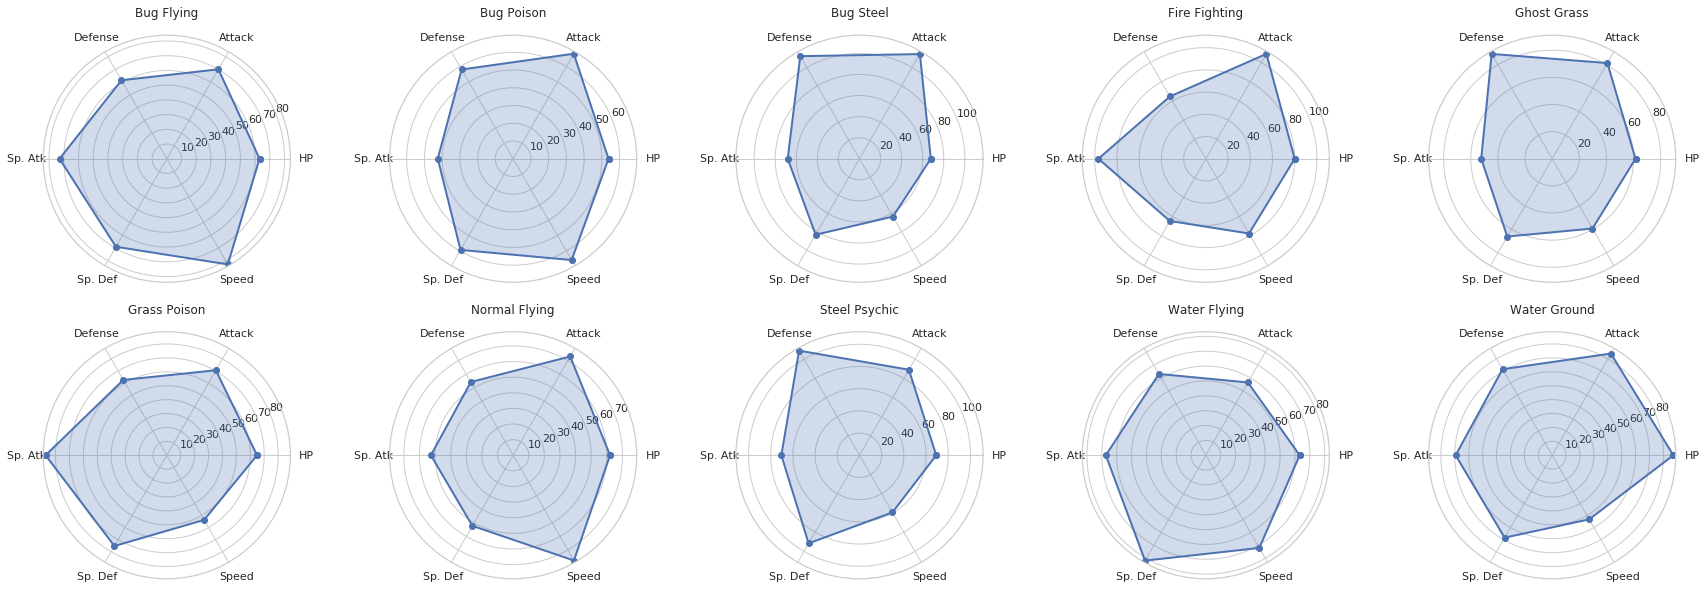

In [16]:
d_type2 = data[~data['Type 2'].isna()].copy()
d_type2['type'] = d_type2['Type 1'].str.cat(d_type2['Type 2'], sep =" ")
d_type2['type'] = d_type2['type'].apply(lambda x: x if x in d_type2['type'].value_counts()[d_type2['type'].value_counts()>6].index else None)
d_type2 = d_type2[~d_type2['type'].isna()]

data_stat2 = d_type2.groupby('type').mean()[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
data_stat2


fig, ax = plt.subplots(2, 5, subplot_kw=dict(projection='polar'),figsize = (30,10))
#fig.add_subplot(111, polar=True)
ind = list(data_stat2.index)
for i,col in enumerate(ind):
    stats=data_stat2.loc[col,:].values
    
    angles=np.linspace(0, 2*np.pi, data_stat2.shape[1], endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax[i//5][i%5].plot(angles, stats, 'o-', linewidth=2)
    ax[i//5][i%5].fill(angles, stats, alpha=0.25)
    ax[i//5][i%5].set_thetagrids(angles * 180/np.pi, data_stat2.columns)
    ax[i//5][i%5].set_title(col)
    ax[i//5][i%5].grid(True)
                

## Распределение некоторых показателей

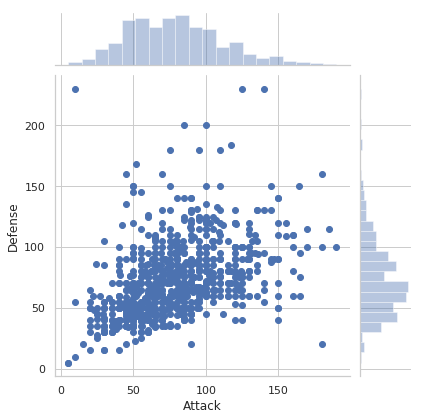

In [17]:
sns.jointplot(x='Attack', y='Defense', data=data)                          
plt.show()

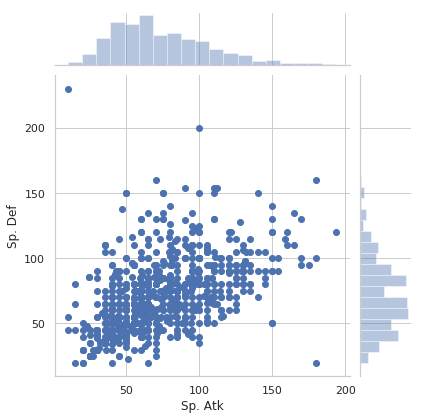

In [18]:
sns.jointplot(x='Sp. Atk', y='Sp. Def', data=data) 
plt.show()

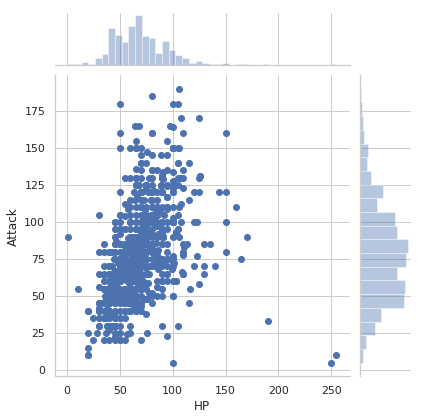

In [19]:
sns.jointplot(x='HP', y='Attack', data=data) 
plt.show()